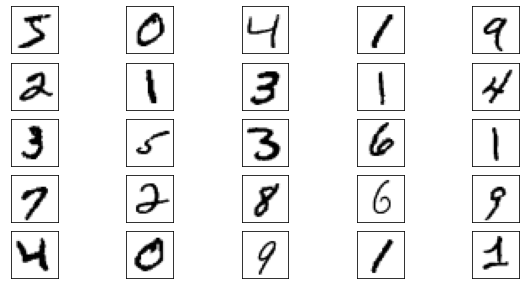

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9188 - val_loss: 0.1532 - val_accuracy: 0.9563
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1266 - accuracy: 0.9635 - val_loss: 0.1112 - val_accuracy: 0.9672
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0854 - accuracy: 0.9745 - val_loss: 0.0989 - val_accuracy: 0.9704
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0879 - val_accuracy: 0.9743
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9735
[[2.3167480e-08 1.6426131e-05 9.9997008e-01 1.0761542e-05 5.4024265e-15
  4.7715627e-08 2.6723230e-09 3.9693103e-11 2.7034073e-06 3.3142868e-12]]
распознанная цифра: 2


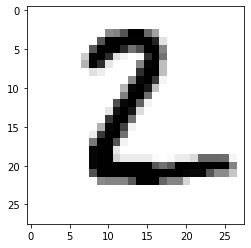

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True False  True]
(265, 28, 28)


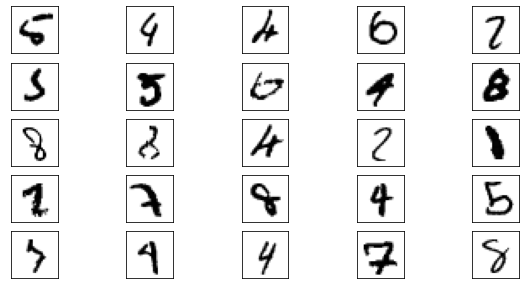

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dense(10, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=128, epochs=20, validation_split=0.12)

scores = model.evaluate(x_test, y_test_cat)
print("Baseline Error: %.2f%%" %(100-scores[1]*100))

Epoch 1/20
413/413 [==============================] - 2s 5ms/step - loss: 0.2482 - accuracy: 0.9274 - val_loss: 0.1155 - val_accuracy: 0.9660
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.0925 - accuracy: 0.9734 - val_loss: 0.0926 - val_accuracy: 0.9733
Epoch 3/20
413/413 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9826 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 4/20
413/413 [==============================] - 3s 8ms/step - loss: 0.0427 - accuracy: 0.9876 - val_loss: 0.0759 - val_accuracy: 0.9797
Epoch 5/20
413/413 [==============================] - 3s 7ms/step - loss: 0.0320 - accuracy: 0.9911 - val_loss: 0.0884 - val_accuracy: 0.9756
Epoch 6/20
413/413 [==============================] - 3s 8ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.0925 - val_accuracy: 0.9769
Epoch 7/20
413/413 [==============================] - 3s 7ms/step - loss: 0.0201 - accuracy: 0.9943 - val_loss: 0.0941 - val_accuracy: 0.9769
Epoch 

ValueError: in user code:

    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Миша\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_59 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 2352)


Введенное число:


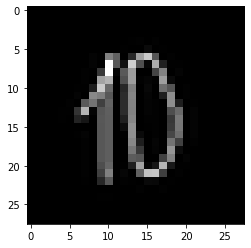

In [77]:
import matplotlib.pyplot as plt
from PIL import Image


def pre_pic(picName):
    # Сначала откройте входящее исходное изображение
    img = Image.open(picName)
         # Используйте метод сглаживания, чтобы изменить размер изображения
    reIm = img.resize((28,28),Image.ANTIALIAS)
         # Стать изображением в оттенках серого, преобразовать в матрицу
    im_arr = np.array(reIm.convert("L"))
    return im_arr

im1 = pre_pic('0.png')
print ('Введенное число:')

plt.imshow(im1,cmap=plt.get_cmap('gray'))
plt.show

im1 = im1.reshape((1,28*28))
im1 = im1.astype('float32')/255

In [1]:
from tkinter import *
import PIL
from PIL import Image, ImageDraw


def save():
    global image_number, n
    filename = f'{image_number}.png'   # image_number increments by 1 at every save
    image1.save(filename)
    image_number += 1    
    n += 1
    root.destroy()
    
def activate_paint(e):
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y


def paint(e):
    global lastx, lasty
    x, y = e.x, e.y
    cv.create_line((lastx, lasty, x, y), fill='white', width=10)
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='white', width=10)
    lastx, lasty = x, y

    
lastx, lasty = None, None
image_number = 0
n = 0

while n <= 4:
    root = Tk()
    
    cv = Canvas(root, width=640, height=480, bg='black')
# --- PIL
    image1 = PIL.Image.new('RGB', (640, 480), 'black')
    draw = ImageDraw.Draw(image1)

    cv.bind('<1>', activate_paint)
    cv.pack(expand=YES, fill=BOTH)

    btn_save = Button(text="save", command=save)
    btn_save.pack()
    root.mainloop()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from keras.regularizers import l2
import random
import matplotlib.pyplot as plt
from PIL import Image
from tkinter import *
import PIL
from PIL import Image, ImageDraw

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dense(10, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=128, epochs=20, validation_split=0.12)

scores = model.evaluate(x_test, y_test_cat)
print("Baseline Error: %.2f%%" %(100-scores[1]*100))

counter = 0
list_a = []
list_b = []

while counter != 5:
    a = random.randint(0, 60000 - 1)
    list_a.append(a)
    list_b.append(x_train[a])
    counter += 1

plt.figure(figsize=(10,10))
n = 0
for i in list_a:
    plt.subplot(5,5,n+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    n += 1
print()
plt.show()

list_b = np.array(list_b)
pred = model.predict(list_b)
predicted_values = []
for j in pred:
    predicted_values.append(np.argmax(j))
print("Нарисуйте по очереди эти числа в появившемся окне")


def save():
    global image_number, n
    filename = f'{image_number}.png'   # image_number increments by 1 at every save
    image1.save(filename)
    image_number += 1    
    n += 1
    root.destroy()
    
def activate_paint(e):
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y


def paint(e):
    global lastx, lasty
    x, y = e.x, e.y
    cv.create_line((lastx, lasty, x, y), fill='white', width=15)
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='white', width=15)
    lastx, lasty = x, y

    
lastx, lasty = None, None
image_number = 0
n = 0

while n <= 4:
    root = Tk()
    
    cv = Canvas(root, width=640, height=480, bg='black')
# --- PIL
    image1 = PIL.Image.new('RGB', (640, 480), 'black')
    draw = ImageDraw.Draw(image1)

    cv.bind('<1>', activate_paint)
    cv.pack(expand=YES, fill=BOTH)

    btn_save = Button(text="save", command=save)
    btn_save.pack()
    root.mainloop()

    
def pre_pic(picName):
    # Сначала откройте входящее исходное изображение
    img = Image.open(picName)
         # Используйте метод сглаживания, чтобы изменить размер изображения
    reIm = img.resize((28,28),Image.ANTIALIAS)
         # Стать изображением в оттенках серого, преобразовать в матрицу
    im_arr = np.array(reIm.convert("L"))
    return im_arr

input_values = []
plt.figure(figsize=(10,10))
for var in range(5): 
    im1 = pre_pic(f'{var}.png')
    plt.subplot(5,5,var+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im1,cmap=plt.get_cmap('gray'))

    im1 = im1.reshape((1,28*28))
    im1 = im1.astype('float32')/255
    input_values.append(np.argmax((model.predict(im1))))
print()
plt.show
print("Числа, которые вы нарисовали, определились системой как: ", input_values)
number = 0
correct_val = 0
for k in input_values:
    if k == predicted_values[number]:
        correct_val += 1
    number += 1
if correct_val >=3:
    print ("Результат - Correct!!!")
    print ("Вы нарисовали более 50% верных чисел и система правильно их определила")
else: 
    print ("Не то совсем нарисовал((")

Epoch 1/20
211/211 [==============================] - 46s 217ms/step - loss: 7.0115 - accuracy: 0.8867 - val_loss: 1.5324 - val_accuracy: 0.9433
Epoch 2/20
211/211 [==============================] - 47s 222ms/step - loss: 1.1276 - accuracy: 0.9441 - val_loss: 0.7051 - val_accuracy: 0.9633
Epoch 3/20
211/211 [==============================] - 48s 228ms/step - loss: 0.6470 - accuracy: 0.9572 - val_loss: 0.6542 - val_accuracy: 0.9627
Epoch 4/20
211/211 [==============================] - 46s 220ms/step - loss: 0.4057 - accuracy: 0.9656 - val_loss: 0.4862 - val_accuracy: 0.9690
Epoch 5/20
211/211 [==============================] - 47s 221ms/step - loss: 0.2801 - accuracy: 0.9717 - val_loss: 0.4955 - val_accuracy: 0.9693
Epoch 6/20
211/211 [==============================] - 48s 227ms/step - loss: 0.2248 - accuracy: 0.9756 - val_loss: 0.3985 - val_accuracy: 0.9712
Epoch 7/20
211/211 [==============================] - 50s 236ms/step - loss: 0.2174 - accuracy: 0.9752 - val_loss: 0.3654 - val_ac

keras.layers.normalization.batch_normalization.BatchNormalization